In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd

service = Service()

# Selenium 웹 드라이버 시작
driver = webdriver.Chrome(service=service)

# 웹 페이지 열기
driver.get('https://ko.semrush.com/trending-websites/global/music')

# 페이지 로딩을 기다리기 위해 잠시 대기
time.sleep(3)

# 스크래핑한 링크를 추적하는 세트
scraped_links_a = set()

data = []


def print_all():
    alls = driver.find_elements(By.CSS_SELECTOR, '#open-trends > div > div:nth-child(3) > div > section')
    for all in alls:
        link_a = all.get_attribute('href')
        if link_a not in scraped_links_a:
            scraped_links_a.add(link_a)
            data.append(all.text)
            print(all.text)
load_more_button_a = driver.find_element(By.CSS_SELECTOR, '#open-trends > div > div:nth-child(3) > div > section > div.dWpoM7T_pxot7qnmadYT > button > span')
load_more_button_a.click()

load_more_button_a = driver.find_element(By.CSS_SELECTOR, '#open-trends > div > div:nth-child(3) > div > section > div.dWpoM7T_pxot7qnmadYT > button > span')
load_more_button_a.click()

load_more_button_a = driver.find_element(By.CSS_SELECTOR, '#open-trends > div > div:nth-child(3) > div > section > div.dWpoM7T_pxot7qnmadYT > button > span')
load_more_button_a.click()


while True:
    try:
        load_more_button_a = driver.find_element(By.CSS_SELECTOR, '#open-trends > div > div:nth-child(3) > div > section > div.dWpoM7T_pxot7qnmadYT > button > span')
        load_more_button_a.click() #open-trends > div > div:nth-child(3) > div > section > div.dWpoM7T_pxot7qnmadYT > button > span
        #open-trends > div > div:nth-child(3) > div > section > div.dWpoM7T_pxot7qnmadYT > button
        time.sleep(3)  # 버튼 클릭 후 데이터 로딩을 기다리기 위해 잠시 대기
        print_all() # 새로운 요소 출력
    except Exception as e:
        print("더 이상 'Load more' 버튼이 없습니다.")
        break

# 드라이버 종료
driver.quit()



# # 데이터프레임 출력


# 수집한 데이터를 데이터프레임으로 변환
df = pd.DataFrame(data, columns=['Text'])
print(df)
# 'Text' 열의 각 요소를 분리하여 리스트 생성
split_data = df['Text'].str.split('\n', expand=True)
display(split_data)

7월 2024
도메인
방문수
데스크톱 공유
모바일 공유
MoM
YoY
주요 트래픽 소스
S
spotify.com
725.07M
55.15%
399.88M
44.85%
325.19M
↑0.88% ↑3.84% 직접
A
amazon.de
604.36M
41.89%
253.18M
58.11%
351.18M
↑15.25% ↓8.98% 직접
S
soundcloud.com
172.64M
54.05%
93.31M
45.95%
79.33M
↑2.08% ↑6.59% 직접
T
ticketmaster.com
97.97M
33.85%
33.16M
66.15%
64.81M
↓8.83% ↓0.92% 직접
U
ultimate-guitar.com
90.48M
33.34%
30.16M
66.66%
60.32M
↑1.73% ↓8.1% 검색
L
letras.mus.br
54.73M
20.72%
11.34M
79.28%
43.39M
↓10.35% ↑9.7% 직접
L
last.fm
51.92M
32.91%
17.09M
67.09%
34.83M
↑1.17% ↓0.09% 직접
B
bandcamp.com
51.53M
37.63%
19.39M
62.37%
32.14M
↑1.88% ↓12.43% 직접
L
letras.com
50.53M
18.1%
9.14M
81.9%
41.39M
↑1.16% ↑23.53% 검색
D
discogs.com
47.69M
45.25%
21.58M
54.75%
26.11M
↓9.5% ↓22.16% 직접
R
rollingstone.com
37.36M
23.96%
8.95M
76.04%
28.41M
↑29.47% ↓30.53% 직접
R
rutracker.org
34.46M
85.54%
29.48M
14.46%
4.98M
↑0.16% ↓23.48% 직접
D
deezer.com
34.05M
34.87%
11.87M
65.13%
22.18M
↓3.53% ↑4.35% 직접
C
chordtela.com
30.21M
5.22%
1.58M
94.78%
28.63M
↑12.87% ↑23.89% 직접


,0,1,2,3,4,5,6,7,8,9,...,798,799,800,801,802,803,804,805,806,807
0,7월 2024,도메인,방문수,데스크톱 공유,모바일 공유,MoM,YoY,주요 트래픽 소스,S,spotify.com,...,4.58M,↓4% ↓20.52% 검색,M,mixkit.co,5.54M,53.04%,2.94M,46.96%,2.6M,↓3.19% ↓6.85% 직접


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data, columns=['Text'])
# print(df)

split_data = df['Text'].str.split('\n', expand=True)
# display(split_data)

st_data = split_data.drop(split_data.columns[0], axis=1)

# 모든 행을 출력
pd.set_option('display.max_rows', None)

# 모든 열을 출력
pd.set_option('display.max_columns', None)
# 결과 출력
# display(st_data)

# 8번째 열부터 데이터를 잘라서 새로운 행으로 변환
columns = st_data.columns
new_rows = []

# 8번째 열부터 8개씩 슬라이싱하여 새로운 행으로 추가
for start in range(7, len(columns), 8):
    new_row = st_data.iloc[0, start:start+8].values.tolist()
    new_rows.append(new_row)

# display(new_rows)
# 새로운 행들을 데이터프레임으로 변환
new_df = pd.DataFrame(new_rows, columns=columns[:8])
# display(new_df)
# 기존 데이터프레임에서 첫 7열을 추출
original_df = st_data.iloc[:, :7]

# 새로운 데이터프레임과 원본 데이터를 결합 (세로로)
result_df = pd.concat([original_df, new_df], ignore_index=True)


result_df.iloc[0] = ['이니셜'] + result_df.iloc[0].tolist()[:-1]

# 결과 출력
display(result_df)

,1,2,3,4,5,6,7,8
0,이니셜,도메인,방문수,데스크톱 공유,모바일 공유,MoM,YoY,주요 트래픽 소스
1,S,spotify.com,725.07M,55.15%,399.88M,44.85%,325.19M,↑0.88% ↑3.84% 직접
2,A,amazon.de,604.36M,41.89%,253.18M,58.11%,351.18M,↑15.25% ↓8.98% 직접
3,S,soundcloud.com,172.64M,54.05%,93.31M,45.95%,79.33M,↑2.08% ↑6.59% 직접
4,T,ticketmaster.com,97.97M,33.85%,33.16M,66.15%,64.81M,↓8.83% ↓0.92% 직접
5,U,ultimate-guitar.com,90.48M,33.34%,30.16M,66.66%,60.32M,↑1.73% ↓8.1% 검색
6,L,letras.mus.br,54.73M,20.72%,11.34M,79.28%,43.39M,↓10.35% ↑9.7% 직접
7,L,last.fm,51.92M,32.91%,17.09M,67.09%,34.83M,↑1.17% ↓0.09% 직접
8,B,bandcamp.com,51.53M,37.63%,19.39M,62.37%,32.14M,↑1.88% ↓12.43% 직접
9,L,letras.com,50.53M,18.1%,9.14M,81.9%,41.39M,↑1.16% ↑23.53% 검색


In [3]:
# df_split = result_df.columns[7].str.split(expand=True) # 이거는 안됨. 오류남.
df_split = result_df.iloc[:, 7].str.split(expand=True)

# 새로운 열 이름 설정
df_split.columns = ['MoM', 'YoY', '주요 트래픽 소스']

# 기존 데이터프레임에 새로운 열 추가
result_df = pd.concat([result_df, df_split], axis=1)
print("열을 분리한 후 데이터프레임:\n", result_df)

열을 분리한 후 데이터프레임:
        1                       2        3        4        5       6        7  \
0    이니셜                     도메인      방문수  데스크톱 공유   모바일 공유     MoM      YoY   
1      S             spotify.com  725.07M   55.15%  399.88M  44.85%  325.19M   
2      A               amazon.de  604.36M   41.89%  253.18M  58.11%  351.18M   
3      S          soundcloud.com  172.64M   54.05%   93.31M  45.95%   79.33M   
4      T        ticketmaster.com   97.97M   33.85%   33.16M  66.15%   64.81M   
5      U     ultimate-guitar.com   90.48M   33.34%   30.16M  66.66%   60.32M   
6      L           letras.mus.br   54.73M   20.72%   11.34M  79.28%   43.39M   
7      L                 last.fm   51.92M   32.91%   17.09M  67.09%   34.83M   
8      B            bandcamp.com   51.53M   37.63%   19.39M  62.37%   32.14M   
9      L              letras.com   50.53M    18.1%    9.14M   81.9%   41.39M   
10     D             discogs.com   47.69M   45.25%   21.58M  54.75%   26.11M   
11     R        rollin

In [4]:
print(result_df.columns.tolist())

[1, 2, 3, 4, 5, 6, 7, 8, 'MoM', 'YoY', '주요 트래픽 소스']


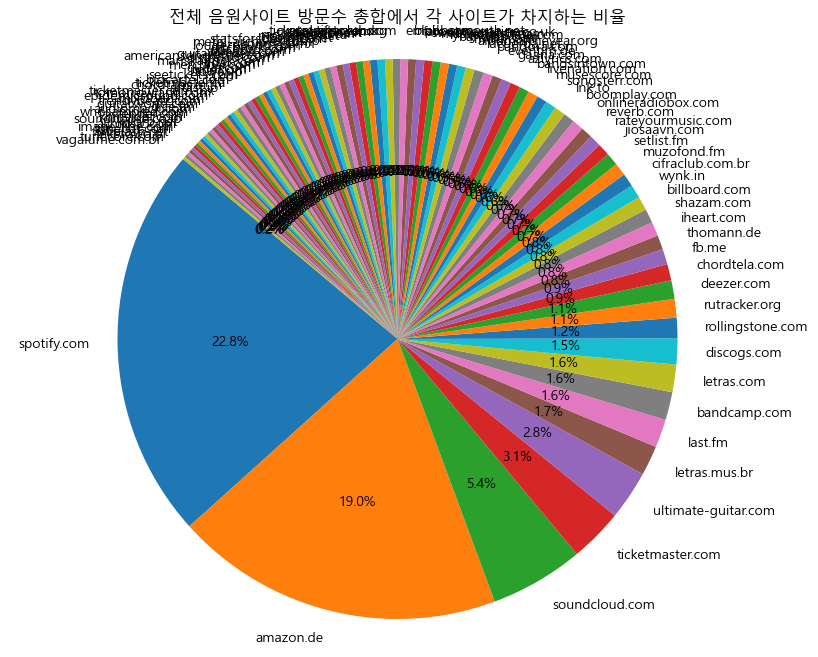

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re


from matplotlib import font_manager, rc

# 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # "맑은 고딕" 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 숫자 부분만 추출하여 float로 변환
def extract_and_convert(value):
    if pd.isna(value):  # NaN 값 처리
        return 0
    # 숫자와 소수점만 남기고 문자 제거, 'M'을 1e6으로 변환, 'K'를 1e3으로 변환
    numeric_part = re.sub(r'[^\d.]', '', str(value))
    if 'M' in str(value):
        return float(numeric_part) * 1e6
    elif 'K' in str(value):
        return float(numeric_part) * 1e3
    return float(numeric_part)

# 3번째 열의 2행부터 100행까지 데이터 선택
column_index = 2
df_sub = result_df.iloc[1:, column_index]

# 숫자로 변환
df_sub_converted = df_sub.apply(extract_and_convert)

# 총합 계산
total_sum = df_sub_converted.sum()

# print(total_sum)

# 비율 계산
percentages = df_sub_converted / total_sum

# print(percentages)

# 비율을 기반으로 파이 차트 그리기
plt.figure(figsize=(10, 8))

# plt.pie(percentages, labels=df_sub.index[:len(percentages)], autopct='%1.1f%%', startangle=140)
# plt.pie(percentages[:99], labels=df_sub.index[1:100], autopct='%1.1f%%', startangle=140)
plt.pie(percentages[:99], labels=result_df[2].iloc[1:100], autopct='%1.1f%%', startangle=140)

plt.title('전체 음원사이트 방문수 총합에서 각 사이트가 차지하는 비율')
plt.axis('equal')  # 동그란 차트
plt.show()

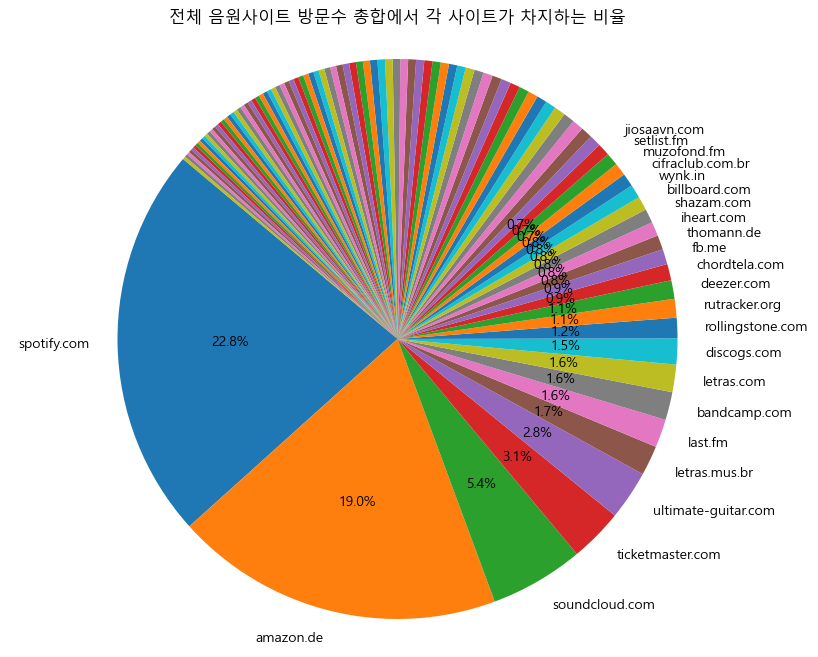

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# 숫자 부분만 추출하여 float로 변환
def extract_and_convert(value):
    if pd.isna(value):  # NaN 값 처리
        return 0
    # 숫자와 소수점만 남기고 문자 제거, 'M'을 1e6으로 변환, 'K'를 1e3으로 변환
    numeric_part = re.sub(r'[^\d.]', '', str(value))
    if 'M' in str(value):
        return float(numeric_part) * 1e6
    elif 'K' in str(value):
        return float(numeric_part) * 1e3
    return float(numeric_part)

# 3번째 열의 2행부터 100행까지 데이터 선택
column_index = 2
df_sub = result_df.iloc[1:, column_index]

# 숫자로 변환
df_sub_converted = df_sub.apply(extract_and_convert)

# 총합 계산
total_sum = df_sub_converted.sum()

# 비율 계산
percentages = df_sub_converted / total_sum

# 라벨 리스트 생성: 0.5% 이상인 경우에만 해당 데이터값을 라벨로 표시
labels = [result_df.iloc[i+1, 1] if percentages.iloc[i] >= 0.007 else '' for i in range(len(percentages))]

# 비율을 기반으로 파이 차트 그리기
plt.figure(figsize=(10, 8))

plt.pie(percentages[:99], labels=labels[:99], autopct=lambda p: f'{p:.1f}%' if p >= 0.7 else '', startangle=140)

plt.title('전체 음원사이트 방문수 총합에서 각 사이트가 차지하는 비율')
plt.axis('equal')  # 동그란 차트
plt.show()

In [9]:
result_df.iloc[1:, column_index]

1      725.07M
2      604.36M
3      172.64M
4       97.97M
5       90.48M
6       54.73M
7       51.92M
8       51.53M
9       50.53M
10      47.69M
11      37.36M
12      34.46M
13      34.05M
14      30.21M
15      27.92M
16      26.51M
17      25.96M
18       25.8M
19      25.48M
20      25.06M
21      24.11M
22      23.54M
23      23.47M
24      22.78M
25      21.66M
26      21.12M
27      20.92M
28      20.54M
29      20.45M
30      19.51M
31      18.55M
32      18.16M
33      18.15M
34      18.05M
35      17.77M
36      17.44M
37       17.3M
38      17.11M
39      16.29M
40      15.85M
41      15.15M
42      15.12M
43      15.05M
44      15.04M
45      14.97M
46      14.41M
47      14.19M
48      13.91M
49      13.91M
50      13.84M
51      13.65M
52      12.84M
53      12.59M
54      12.48M
55      12.12M
56      12.05M
57      11.03M
58         11M
59       10.6M
60       9.89M
61       9.86M
62       9.54M
63       9.44M
64       9.37M
65       9.33M
66       9.11M
67       9

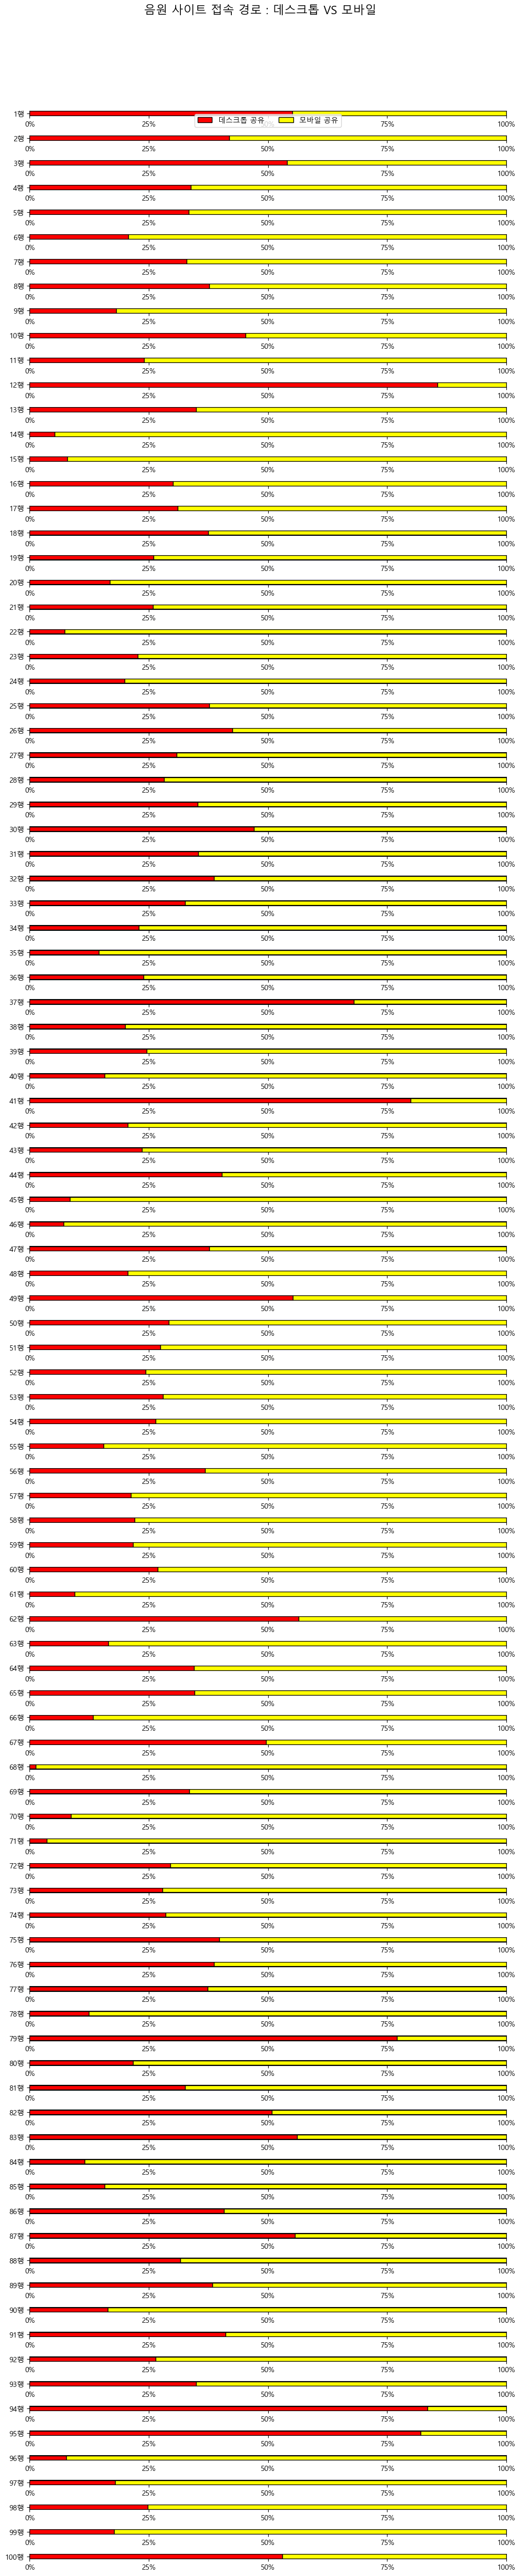

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # "맑은 고딕" 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


# 데이터프레임 준비
result_df = pd.concat([result_df, df_split], axis=1)

# 0행 제거
result_df = result_df.drop(index=0)

# 백분율 문자열 처리 - 문자열 데이터만 처리
result_df[4] = result_df[4].apply(lambda x: float(x.rstrip('%')) if isinstance(x, str) else x)
result_df[6] = result_df[6].apply(lambda x: float(x.rstrip('%')) if isinstance(x, str) else x)

# 그래프 그리기
fig, axs = plt.subplots(nrows=len(result_df), ncols=1, figsize=(10, len(result_df) * 0.5))

for i in range(len(result_df)):
    axs[i].barh(f'{i+1}행', result_df[4].iloc[i], color='red', edgecolor='black', label='데스크톱 공유' if i == 0 else "")
    axs[i].barh(f'{i+1}행', result_df[6].iloc[i], color='yellow', edgecolor='black', left=result_df[4].iloc[i], label='모바일 공유' if i == 0 else "")
    axs[i].set_xlim(0, 100)  # 100%까지 보이도록 x축 범위 설정
    axs[i].set_xticks([0, 25, 50, 75, 100])  # x축 눈금 설정
    axs[i].set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

# 전체 그래프 제목 추가
fig.suptitle('음원 사이트 접속 경로 : 데스크톱 VS 모바일', fontsize=16)

# 범례 추가
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목과 겹치지 않도록 레이아웃 조정
plt.show()

In [17]:
result_df.iloc[100]

1                           M
2                   mixkit.co
3                       5.54M
4                      53.04%
5                       2.94M
6                      46.96%
7                        2.6M
8            ↓3.19% ↓6.85% 직접
MoM                    ↓3.19%
YoY                    ↓6.85%
주요 트래픽 소스                  직접
Name: 100, dtype: object

In [ ]:
result_df[2].iloc[1:]

In [ ]:
1. Pandas DataFrame에서 NumPy 배열로 전환하기
Pandas DataFrame을 NumPy 배열로 변환하는 방법은 다음과 같습니다:

(1) .values 속성 사용
설명: DataFrame의 .values 속성은 DataFrame의 데이터를 NumPy 배열로 반환합니다.

# DataFrame을 NumPy 배열로 변환
array_2d = df.values

(2) .to_numpy() 메서드 사용
설명: DataFrame의 .to_numpy() 메서드는 데이터를 NumPy 배열로 변환합니다. .values와 동일한 기능을 하지만, .to_numpy()는 추가적인 옵션을 제공할 수 있습니다.

NumPy 배열로 변환할 때 데이터 타입(dtype)과 배열의 복사 여부 등을 지정할 수 있는 다양한 옵션을 제공

- dtype: 배열의 데이터 타입을 지정할 수 있습니다. 기본적으로 DataFrame의 데이터 타입을 유지하지만, 다른 데이터 타입으로 변환할 수도 있습니다.
- copy: 배열을 복사할지 여부를 지정합니다. 기본값은 True이며, DataFrame의 데이터를 복사하여 새로운 배열을 만듭니다. False로 설정하면, 가능할 경우 원본 DataFrame의 데이터를 공유하는 뷰가 반환됩니다.


# DataFrame을 NumPy 배열로 변환
array_2d = df.to_numpy()

2. NumPy 배열에서 Pandas DataFrame으로 전환하기
NumPy 배열을 Pandas DataFrame으로 변환하는 방법은 다음과 같습니다:

(1) pd.DataFrame() 생성자 사용
설명: NumPy 배열을 DataFrame으로 변환할 때는 pd.DataFrame() 생성자를 사용하여 배열을 DataFrame으로 감쌀 수 있습니다. 열 이름과 인덱스를 지정할 수 있습니다.

# NumPy 배열을 DataFrame으로 변환
df = pd.DataFrame(array_2d, columns=['feature1', 'feature2'])


(2) pd.DataFrame.from_records() 메서드 사용
설명: pd.DataFrame.from_records() 메서드는 구조화된 데이터나 레코드 배열을 DataFrame으로 변환할 수 있습니다. 이 방법은 NumPy 배열의 데이터가 구조화된 경우에 유용합니다.

# NumPy 배열을 DataFrame으로 변환
df = pd.DataFrame.from_records(array_2d, columns=['feature1', 'feature2'])

요약
Pandas DataFrame에서 NumPy 배열로 변환:

df.values
df.to_numpy()
NumPy 배열에서 Pandas DataFrame으로 변환:

pd.DataFrame(array_2d, columns=['column_names'])
pd.DataFrame.from_records(array_2d, columns=['column_names'])


reshape 메서드는 NumPy 배열의 메서드
데이터프레임의 형태를 변경할 때는 pivot, melt, stack, unstack 등의 Pandas 메서드를 사용합니다.

X_train = X_train.reshape(-1, 1)에서
-1: 자동으로 차원의 크기를 계산하게 하는 특별한 값입니다.
1은 열 갯수. 1열 생성됨. 즉, 1개의 특성(feature)가 생성된다.

Pandas DataFrame의 경우
Pandas DataFrame에서는 데이터의 형태를 변경할 때 다른 메서드를 사용합니다. Pandas DataFrame의 행과 열을 재구성하거나 데이터를 변환하는 방법은 다음과 같습니다:

pivot: 데이터를 피벗하여 재구성합니다.
melt: 데이터를 긴 형태로 변환합니다.
stack: DataFrame의 열을 행으로 변환합니다.
unstack: DataFrame의 행을 열로 변환합니다.
transpose: DataFrame의 행과 열을 교환합니다.

1D 배열과 2D 배열의 형태
1D 배열
[10, 20, 30, 40]: 이것은 1D 배열로, 형태는 (4,)입니다. 즉, 4개의 원소를 가진 1차원 배열입니다.
2D 배열의 형태
[[10, 20, 30, 40]]: 이 배열은 2D 배열로, 형태는 (1, 4)입니다. 즉, 1개의 행과 4개의 열을 가진 2차원 배열입니다.

[[10], [20], [30], [40]]: 이 배열은 2D 배열로, 형태는 (4, 1)입니다. 즉, 4개의 행과 1개의 열을 가진 2차원 배열입니다.

In [13]:
### 참고 : 모델 만들기
### 데이터 수가 1개 밖에 없어서 예측은 안되지만 (MSE: 3205.8283197772616) 이런 과정을 통해서 최적의 파라미터를 찾아서 모델을 만드는 과정 보여주기



In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import joblib

# 데이터프레임 로딩
# result_df = pd.read_csv('your_data.csv')  # 실제 데이터프레임 로딩 코드

# # # 9번째 열을 숫자로 변환
# result_df['numeric_col'] = pd.to_numeric(result_df.iloc[:, 9], errors='coerce')

# print(result_df['numeric_col'])
# 9번째 열의 데이터를 가져오기
yoy_data = result_df.loc[:,'MoM']

# 퍼센트와 숫자만 추출
yoy_data = yoy_data.str.extract(r'([+-]?\d+\.\d+|\d+)')[0].astype(float)
# print(yoy_data)

# 데이터 확인
# print("전처리된 9번째 열의 데이터:\n", yoy_data)


# # NaN 값을 0으로 대체 (선택사항)
# result_df['numeric_col'].fillna(0, inplace=True)

# # 'YoY' 열이 존재하는지 확인
# if 'YoY' not in result_df.columns:
#     raise ValueError("'YoY' column not found in the dataframe.")

# 9번째 열만 피처로 사용
# X = result_df.iloc[:, 9].values.reshape(-1, 1)  # 9번째 열만 선택하고, 2D 배열로 변환

# y 변수 처리: 화살표, 퍼센트, 문자열 제거하고 숫자만 추출
y = result_df.loc[:,'YoY']  # y는 9번째 열이라고 가정
y = y.str.extract(r'([+-]?\d+\.\d+|\d+)')[0].astype(float)

y = y
# y = y.ravel()
X = yoy_data 
# print(result_df)
# print(result_df.iloc[:, 9])
# print(result_df['YoY'])

# X와 y의 샘플 수 확인
# print("X shape:", X.shape)
# print("y shape:", y.shape)
# print(X_train) 
# print(X_test) 
# print(y_train) 
# print(y_test)
# 데이터 분할
if X.shape[0] > 0 and y.shape[0] > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise ValueError("X or y is empty. Check the data preprocessing steps.")

import numpy as np

# X_train을 numpy 배열로 변환 후 2D 배열로 reshape
X_train = np.array(X_train).reshape(-1, 1)

# y_train을 numpy 배열로 변환 후 2D 배열로 reshape (필요한 경우)
y_train = np.array(y_train).reshape(-1, 1)

# # X_train이 1D 배열이라면 2D 배열로 변환
# X_train = X_train.reshape(-1, 1)

# # 또는 y_train을 변환 (보통 필요하지 않지만, 안전을 위해 확인)
# y_train = y_train.reshape(-1, 1)

# 랜덤포레스트 모델 정의
rf = RandomForestRegressor(random_state=42)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 통한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
# y_train = y_train.ravel()
# X_train = X_train.ravel()
# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


E:\ANa\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [41]:
import numpy as np

# 결측치가 없는 값만 선택 (Series일 경우)
mask = ~np.isnan(X_test)
X_test = X_test[mask]
y_test = y_test[mask]

# Series를 NumPy 배열로 변환 후 reshape 적용
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# 최적의 모델로 예측
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of the best model: ", mse)

# 모델 저장
joblib.dump(best_rf, 'best_random_forest_model.pkl')

# 모델 로드 예시
# best_rf = joblib.load('best_random_forest_model.pkl')

best_rf

Mean Squared Error of the best model:  2266.060883900095


RandomForestRegressor(min_samples_leaf=4, min_samples_split=10, random_state=42)

In [39]:
# import numpy as np

# # 결측치가 없는 행만 선택
# mask = ~np.isnan(X_test).any(axis=1)
# X_test = X_test[mask]
# y_test = y_test[mask]

# # X_test = X_test.dropna()
# # y_test = y_test.dropna()

# # # Pandas Series를 NumPy 배열로 변환 후 reshape 적용
# # X_test = X_test.values.reshape(-1, 1)
# # y_test = y_test.values.reshape(-1, 1)

# # 이미 NumPy 배열이므로, 바로 reshape 적용
# X_test = X_test.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)


# # X_test = X_test.reshape(1, -1)
# # y_test = y_test.reshape(1, -1)

# # 최적의 모델로 예측
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test)

# # 모델 성능 평가
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error of the best model: ", mse)

# # 모델 저장
# joblib.dump(best_rf, 'best_random_forest_model.pkl')

# # 모델 로드 예시
# # best_rf = joblib.load('best_random_forest_model.pkl')

# best_rf


# 이 오류는 X_test가 pandas의 Series 객체라는 점에서 발생합니다. Series 객체에는 axis=1이 존재하지 않기 때문에 ValueError: No axis named 1 for object type Series 오류가 발생합니다.

# 코드 수정
# X_test가 Series일 경우, 결측치가 있는 값을 처리하는 방법을 수정해야 합니다.

# X_test가 Series일 경우, 결측치가 없는 값을 선택할 때 axis=1을 사용할 수 없으므로, axis=0을 사용하거나 np.isnan()을 직접 적용해야 합니다.
# X_test를 reshape하기 전에 Series를 DataFrame으로 변환하거나, reshape를 Series에 직접 적용할 수 있습니다.

ValueError: No axis named 1 for object type Series

In [42]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 예시로 사용될 기존 데이터
# 실제로는 'yoy_data'와 'y'를 기존 데이터로 대체합니다.
X = X_train = np.array(X_train).reshape(-1, 1)
y = y_train = np.array(y_train).reshape(-1, 1) 
y = y.ravel()# 특징 데이터 (2D 배열 형식)
  # 실제 트래픽 값 (1D 배열 형식)

# 기존 모델을 통해 예측을 수행하기 위해, 기존 데이터에서 학습한 모델을 사용합니다.
# 이미 학습된 모델을 불러옵니다 (예: best_rf)
best_rf = RandomForestRegressor(min_samples_leaf=4, min_samples_split=10, random_state=42)

# 모델을 학습시킵니다 (기존 데이터 사용)
best_rf.fit(X, y)

# 다음 해의 데이터를 예측하기 위해, 현재 데이터에서 예측 수행
# 일반적으로 예측을 위한 새로운 데이터를 생성하지만, 여기서는 기존 데이터를 사용합니다.
y_pred = best_rf.predict(X)

# 예측 결과 확인
print("다음 해의 예측된 트래픽 값:")
print(y_pred)

# 예측 성능 평가 (선택 사항)
mse = mean_squared_error(y, y_pred)
print("예측의 평균 제곱 오차 (MSE):", mse)

다음 해의 예측된 트래픽 값:
[ 12.54204854  15.58315477  15.59085849   9.44560621  12.54204854
  14.01904499  16.66768177  14.38565775  13.67905593  47.6967254
  12.54204854  22.49533655  17.69409981  14.55060527  15.69167958
  16.81344652  10.84907392  21.90796511  29.6027008   17.494009
  17.18083123  20.23890663  16.01521923  22.17043571  30.56212721
  17.35598315  11.64876369  23.22106875  12.54204854  17.1271431
  19.58623577   8.82848953  18.11986426  21.04183012  15.04890968
  95.20267435  14.5919582   13.22139932  14.32166459  10.05155035
   8.96956802  13.46377645  33.45909282  23.9209754   18.11884064
 106.79950787  13.64921308  24.8327958   16.63101926 106.79950787
 106.79950787  14.14497974  23.60886962  20.6729859   23.37760303
  16.5632876   12.54204854  14.6913947   17.89950388  17.0849854
   8.76134667  13.84388653  19.89268577  11.3156093   17.1101379
 106.79950787  24.73686287  14.57197155  17.06005074  16.61446977
  30.56212721  10.79766515  25.38755582  16.79258912  16.76374196

In [43]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error




X = yoy_data = np.array(X_train).reshape(-1, 1)
y = y = np.array(y_train).reshape(-1, 1)
# 예시로 사용될 기존 데이터
# 실제로는 'yoy_data'와 'y'를 기존 데이터로 대체합니다.
y = y
X = yoy_data   # 특징 데이터 (2D 배열 형식)
  # 실제 트래픽 값 (1D 배열 형식)

# 기존 모델을 통해 예측을 수행하기 위해, 기존 데이터에서 학습한 모델을 사용합니다.
# 이미 학습된 모델을 불러옵니다 (예: best_rf)
best_rf = RandomForestRegressor(min_samples_leaf=4, min_samples_split=10, random_state=42)

# 모델을 학습시킵니다 (기존 데이터 사용)
best_rf.fit(X, y)

# 다음 해의 데이터를 예측하기 위해, 현재 데이터에서 예측 수행
# 일반적으로 예측을 위한 새로운 데이터를 생성하지만, 여기서는 기존 데이터를 사용합니다.
y_pred = best_rf.predict(X)

# 예측 결과 확인
print("다음 해의 예측된 트래픽 값:")
print(y_pred)

# 예측 성능 평가 (선택 사항)
mse = mean_squared_error(y, y_pred)
print("예측의 평균 제곱 오차 (MSE):", mse)

다음 해의 예측된 트래픽 값:
[ 12.54204854  15.58315477  15.59085849   9.44560621  12.54204854
  14.01904499  16.66768177  14.38565775  13.67905593  47.6967254
  12.54204854  22.49533655  17.69409981  14.55060527  15.69167958
  16.81344652  10.84907392  21.90796511  29.6027008   17.494009
  17.18083123  20.23890663  16.01521923  22.17043571  30.56212721
  17.35598315  11.64876369  23.22106875  12.54204854  17.1271431
  19.58623577   8.82848953  18.11986426  21.04183012  15.04890968
  95.20267435  14.5919582   13.22139932  14.32166459  10.05155035
   8.96956802  13.46377645  33.45909282  23.9209754   18.11884064
 106.79950787  13.64921308  24.8327958   16.63101926 106.79950787
 106.79950787  14.14497974  23.60886962  20.6729859   23.37760303
  16.5632876   12.54204854  14.6913947   17.89950388  17.0849854
   8.76134667  13.84388653  19.89268577  11.3156093   17.1101379
 106.79950787  24.73686287  14.57197155  17.06005074  16.61446977
  30.56212721  10.79766515  25.38755582  16.79258912  16.76374196

C:\Users\user\AppData\Local\Temp\ipykernel_9076\4075317852.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(X, y)


In [44]:
# X와 y의 크기 확인
print("X shape:", X.shape)
print("y shape:", y.shape)

# 예측할 데이터 X_test의 크기 확인
print("X_test shape:", X_test.shape)

# 예측값의 개수 확인
print("Number of predictions:", len(y_pred))

# 실제 y_test와 예측값 y_pred의 크기 확인
print("y_test shape:", y_test.shape)

X shape: (80, 1)
y shape: (80, 1)
X_test shape: (20, 1)
Number of predictions: 80
y_test shape: (20, 1)


In [19]:
result_df[2].iloc[8]

'bandcamp.com'

In [16]:
print(result_df.shape)

(101, 8)


In [17]:
print(result_df.columns)

RangeIndex(start=1, stop=9, step=1)


In [31]:
print(result_df.columns)

Index([1, 2, 3, 4, 5, 6, 7, 8, 'MoM', 'YoY', '주요 트래픽 소스'], dtype='object')


In [30]:
print(result_df['YoY'])

1        ↑3.84%
2        ↓8.98%
3        ↑6.59%
4        ↓0.92%
5         ↓8.1%
6         ↑9.7%
7        ↓0.09%
8       ↓12.43%
9       ↑23.53%
10      ↓22.16%
11      ↓30.53%
12      ↓23.48%
13       ↑4.35%
14      ↑23.89%
15      ↑18.45%
16      ↓15.22%
17       ↓5.85%
18      ↑24.46%
19       ↑2.77%
20      ↑26.42%
21      ↓21.58%
22       ↑2.12%
23       ↓1.94%
24       ↑34.7%
25      ↓22.27%
26       ↓18.9%
27      ↓15.13%
28       ↑74.9%
29        ↓8.3%
30       ↓7.04%
31      ↑12.57%
32       ↑7.17%
33      ↑15.13%
34      ↓37.12%
35       ↑8.31%
36       ↓5.33%
37       ↑0.09%
38      ↓13.69%
39      ↑58.34%
40       ↑3.21%
41      ↑26.27%
42      ↓27.18%
43      ↑11.13%
44      ↓13.78%
45      ↑88.38%
46      ↓28.36%
47       ↓6.61%
48      ↑50.38%
49      ↑17.58%
50       ↓8.06%
51      ↓25.57%
52       ↑2.86%
53       ↑50.5%
54       ↑0.73%
55      ↓27.53%
56      ↓10.36%
57      ↓12.58%
58       ↓9.36%
59      ↓10.51%
60       ↑3.77%
61       ↑6.76%
62      ↓13.28%
63      

In [28]:
# 'YoY' 열을 가져오기
result_df['YoY']

1        ↑3.84%
2        ↓8.98%
3        ↑6.59%
4        ↓0.92%
5         ↓8.1%
6         ↑9.7%
7        ↓0.09%
8       ↓12.43%
9       ↑23.53%
10      ↓22.16%
11      ↓30.53%
12      ↓23.48%
13       ↑4.35%
14      ↑23.89%
15      ↑18.45%
16      ↓15.22%
17       ↓5.85%
18      ↑24.46%
19       ↑2.77%
20      ↑26.42%
21      ↓21.58%
22       ↑2.12%
23       ↓1.94%
24       ↑34.7%
25      ↓22.27%
26       ↓18.9%
27      ↓15.13%
28       ↑74.9%
29        ↓8.3%
30       ↓7.04%
31      ↑12.57%
32       ↑7.17%
33      ↑15.13%
34      ↓37.12%
35       ↑8.31%
36       ↓5.33%
37       ↑0.09%
38      ↓13.69%
39      ↑58.34%
40       ↑3.21%
41      ↑26.27%
42      ↓27.18%
43      ↑11.13%
44      ↓13.78%
45      ↑88.38%
46      ↓28.36%
47       ↓6.61%
48      ↑50.38%
49      ↑17.58%
50       ↓8.06%
51      ↓25.57%
52       ↑2.86%
53       ↑50.5%
54       ↑0.73%
55      ↓27.53%
56      ↓10.36%
57      ↓12.58%
58       ↓9.36%
59      ↓10.51%
60       ↑3.77%
61       ↑6.76%
62      ↓13.28%
63      

In [23]:
result_df.columns.tolist()

[1, 2, 3, 4, 5, 6, 7, 8]

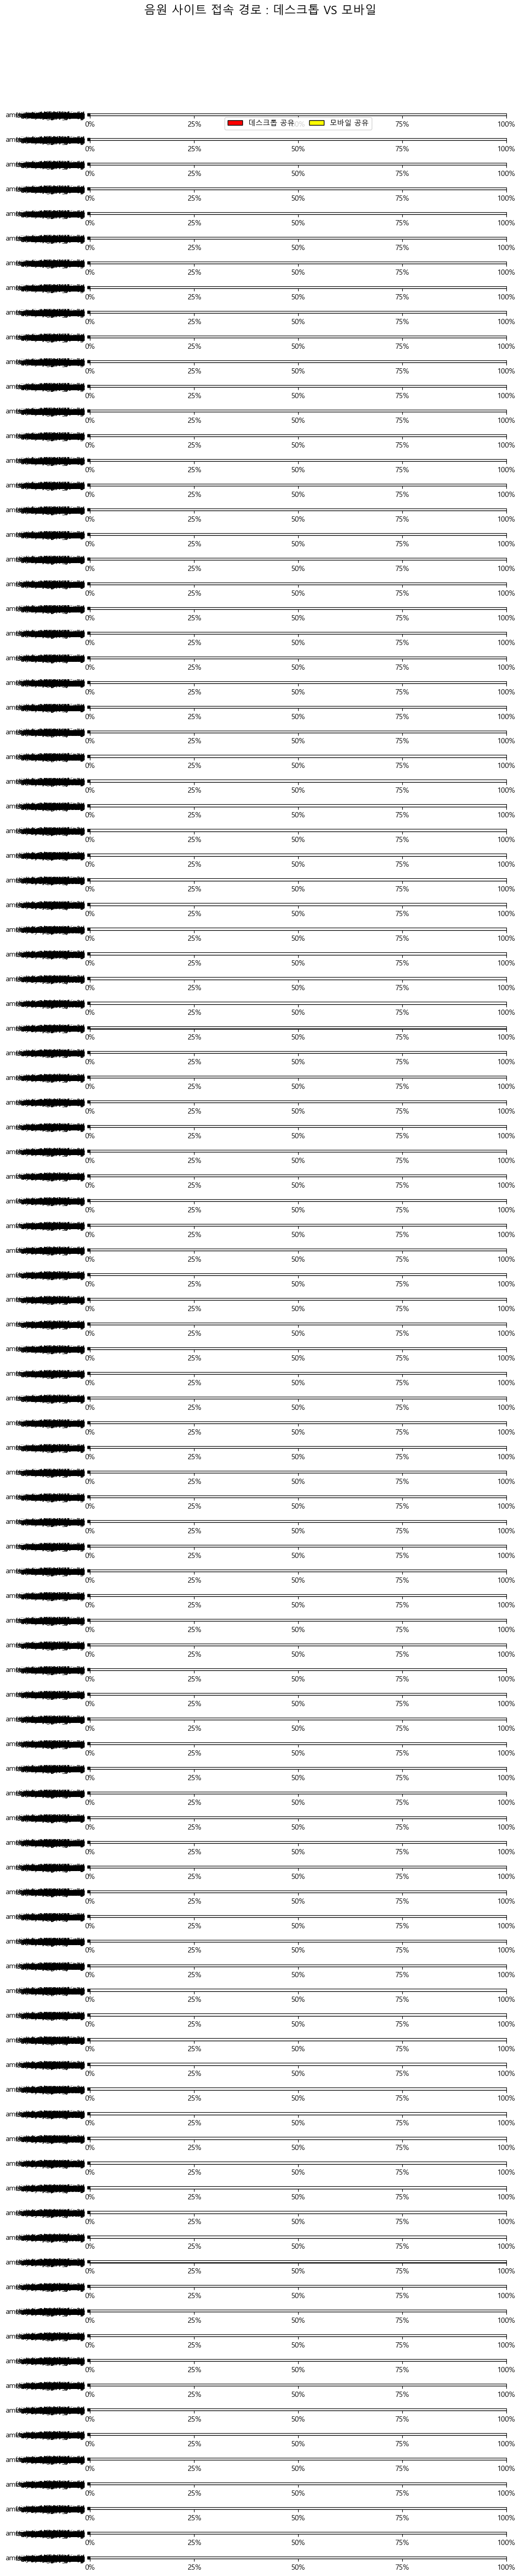

In [51]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib import font_manager, rc

# # 폰트 설정
# font_path = 'C:/Windows/Fonts/malgun.ttf'  # "맑은 고딕" 폰트 경로
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)

# # 데이터프레임 준비
# result_df = pd.concat([result_df, df_split], axis=1)

# # 0행 제거
# result_df = result_df.drop(index=0)

# # 백분율 문자열 처리 - 문자열 데이터만 처리
# result_df[4] = result_df[4].apply(lambda x: float(x.rstrip('%')) if isinstance(x, str) else x)
# result_df[6] = result_df[6].apply(lambda x: float(x.rstrip('%')) if isinstance(x, str) else x)

# # 그래프 그리기
# fig, axs = plt.subplots(nrows=len(result_df), ncols=1, figsize=(10, len(result_df) * 0.5))

# # y축 레이블을 result_df의 2열의 값으로 설정
# yticks_labels = result_df[2].iloc[0:100].values

# for i in range(len(result_df)):
#     axs[i].barh(f'{i+1}행', result_df[4].iloc[i], color='red', edgecolor='black', label='데스크톱 공유' if i == 0 else "")
#     axs[i].barh(f'{i+1}행', result_df[6].iloc[i], color='yellow', edgecolor='black', left=result_df[4].iloc[i], label='모바일 공유' if i == 0 else "")
#     axs[i].set_xlim(0, 100)  # 100%까지 보이도록 x축 범위 설정
#     axs[i].set_xticks([0, 25, 50, 75, 100])  # x축 눈금 설정
#     axs[i].set_xticklabels(['0%', '25%', '50%', '75%', '100%'])
#     axs[i].set_yticks(range(len(result_df)))  # y축 눈금 설정
#     axs[i].set_yticklabels(yticks_labels)  # y축 레이블 설정

# # 전체 그래프 제목 추가
# fig.suptitle('음원 사이트 접속 경로 : 데스크톱 VS 모바일', fontsize=16)

# # 범례 추가
# axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

# plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목과 겹치지 않도록 레이아웃 조정
# plt.show()

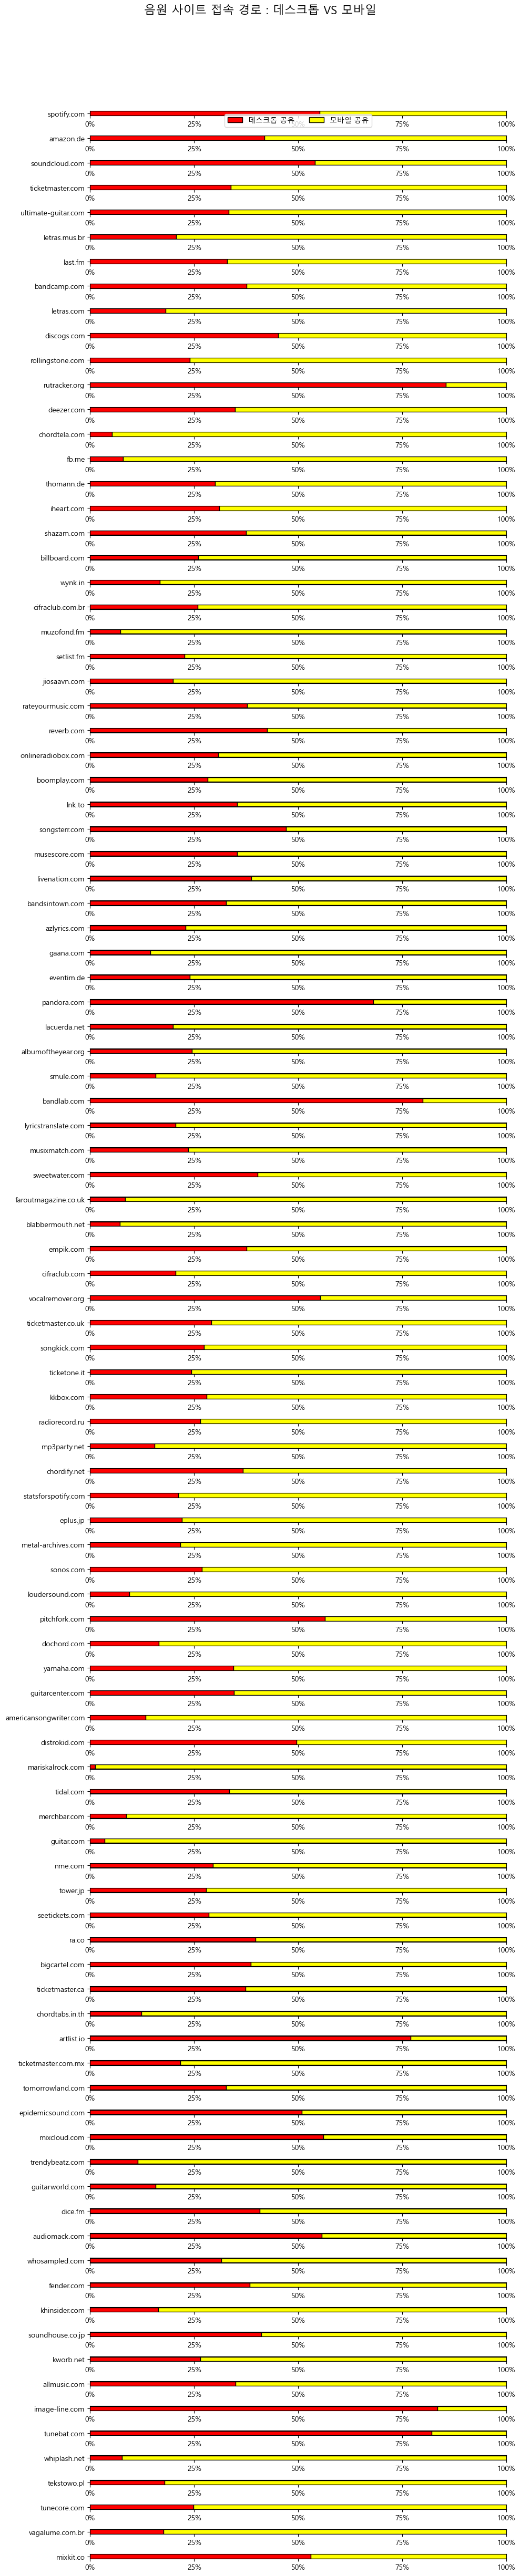

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # "맑은 고딕" 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 데이터프레임 준비
result_df = pd.concat([result_df, df_split], axis=1)

# 0행 제거
result_df = result_df.drop(index=0)

# 백분율 문자열 처리 - 문자열 데이터만 처리
result_df[4] = result_df[4].apply(lambda x: float(x.rstrip('%')) if isinstance(x, str) else x)
result_df[6] = result_df[6].apply(lambda x: float(x.rstrip('%')) if isinstance(x, str) else x)

# y축 레이블을 result_df의 2열 데이터로 설정
yticks_labels = result_df[2].iloc[0:len(result_df)].values

# 그래프 그리기
fig, axs = plt.subplots(nrows=len(result_df), ncols=1, figsize=(10, len(result_df) * 0.5))

for i in range(len(result_df)):
    axs[i].barh(yticks_labels[i], result_df[4].iloc[i], color='red', edgecolor='black', label='데스크톱 공유' if i == 0 else "")
    axs[i].barh(yticks_labels[i], result_df[6].iloc[i], color='yellow', edgecolor='black', left=result_df[4].iloc[i], label='모바일 공유' if i == 0 else "")
    axs[i].set_xlim(0, 100)  # 100%까지 보이도록 x축 범위 설정
    axs[i].set_xticks([0, 25, 50, 75, 100])  # x축 눈금 설정
    axs[i].set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

# 전체 그래프 제목 추가
fig.suptitle('음원 사이트 접속 경로 : 데스크톱 VS 모바일', fontsize=16)

# 범례 추가
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목과 겹치지 않도록 레이아웃 조정
plt.show()

In [50]:
result_df[2].iloc[0:100]

1                 spotify.com
2                   amazon.de
3              soundcloud.com
4            ticketmaster.com
5         ultimate-guitar.com
6               letras.mus.br
7                     last.fm
8                bandcamp.com
9                  letras.com
10                discogs.com
11           rollingstone.com
12              rutracker.org
13                 deezer.com
14              chordtela.com
15                      fb.me
16                 thomann.de
17                 iheart.com
18                 shazam.com
19              billboard.com
20                    wynk.in
21           cifraclub.com.br
22                muzofond.fm
23                 setlist.fm
24               jiosaavn.com
25          rateyourmusic.com
26                 reverb.com
27         onlineradiobox.com
28               boomplay.com
29                     lnk.to
30              songsterr.com
31              musescore.com
32             livenation.com
33            bandsintown.com
34        

In [47]:
print(len(result_df[2]))

100


In [48]:
result_df[2]

1                 spotify.com
2                   amazon.de
3              soundcloud.com
4            ticketmaster.com
5         ultimate-guitar.com
6               letras.mus.br
7                     last.fm
8                bandcamp.com
9                  letras.com
10                discogs.com
11           rollingstone.com
12              rutracker.org
13                 deezer.com
14              chordtela.com
15                      fb.me
16                 thomann.de
17                 iheart.com
18                 shazam.com
19              billboard.com
20                    wynk.in
21           cifraclub.com.br
22                muzofond.fm
23                 setlist.fm
24               jiosaavn.com
25          rateyourmusic.com
26                 reverb.com
27         onlineradiobox.com
28               boomplay.com
29                     lnk.to
30              songsterr.com
31              musescore.com
32             livenation.com
33            bandsintown.com
34        

In [26]:
print(result_df.columns.tolist())

[1, 2, 3, 4, 5, 6, 7, 8, 'MoM', 'YoY', '주요 트래픽 소스']


In [27]:
result_df['YoY']

1        ↑3.84%
2        ↓8.98%
3        ↑6.59%
4        ↓0.92%
5         ↓8.1%
6         ↑9.7%
7        ↓0.09%
8       ↓12.43%
9       ↑23.53%
10      ↓22.16%
11      ↓30.53%
12      ↓23.48%
13       ↑4.35%
14      ↑23.89%
15      ↑18.45%
16      ↓15.22%
17       ↓5.85%
18      ↑24.46%
19       ↑2.77%
20      ↑26.42%
21      ↓21.58%
22       ↑2.12%
23       ↓1.94%
24       ↑34.7%
25      ↓22.27%
26       ↓18.9%
27      ↓15.13%
28       ↑74.9%
29        ↓8.3%
30       ↓7.04%
31      ↑12.57%
32       ↑7.17%
33      ↑15.13%
34      ↓37.12%
35       ↑8.31%
36       ↓5.33%
37       ↑0.09%
38      ↓13.69%
39      ↑58.34%
40       ↑3.21%
41      ↑26.27%
42      ↓27.18%
43      ↑11.13%
44      ↓13.78%
45      ↑88.38%
46      ↓28.36%
47       ↓6.61%
48      ↑50.38%
49      ↑17.58%
50       ↓8.06%
51      ↓25.57%
52       ↑2.86%
53       ↑50.5%
54       ↑0.73%
55      ↓27.53%
56      ↓10.36%
57      ↓12.58%
58       ↓9.36%
59      ↓10.51%
60       ↑3.77%
61       ↑6.76%
62      ↓13.28%
63      